### Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA

from utils import *

In [2]:
data = np.loadtxt("data/data.txt")
labels = np.loadtxt("data/labels.txt")

In [3]:
classes = np.unique(labels)
conv_data = data[:, :4224]
print(data.shape, labels.shape, conv_data.shape)

(2500, 12416) (2500,) (2500, 4224)


In [27]:
data, conv_data = conv_data, data
print(data.shape, conv_data.shape)

(2500, 12416) (2500, 4224)


## Direct KMeans

In [7]:
kmeans = KMeans(n_clusters=len(classes)*5, random_state=0, n_jobs=-1, verbose=1).fit(data)
kmeans.cluster_centers_

array([[0.03552036, 0.00855111, 0.16653278, ..., 0.05585421, 0.96905558,
        0.00902279],
       [0.11232623, 0.01321327, 0.03390885, ..., 0.0092546 , 0.01067411,
        0.0097657 ],
       [0.04573529, 0.00913244, 0.05244476, ..., 0.0091276 , 0.00969518,
        0.01049834],
       ...,
       [0.01333547, 0.00852698, 0.32557337, ..., 0.24495199, 0.66608602,
        0.00911679],
       [0.01099265, 0.0086549 , 0.07373353, ..., 0.00817126, 0.0089478 ,
        0.00906443],
       [0.02261466, 0.01084096, 0.21697451, ..., 0.1557893 , 0.83608456,
        0.00941427]])

In [8]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
centers = pca.transform(kmeans.cluster_centers_)
data_pca.shape, centers.shape

((2500, 2), (25, 2))

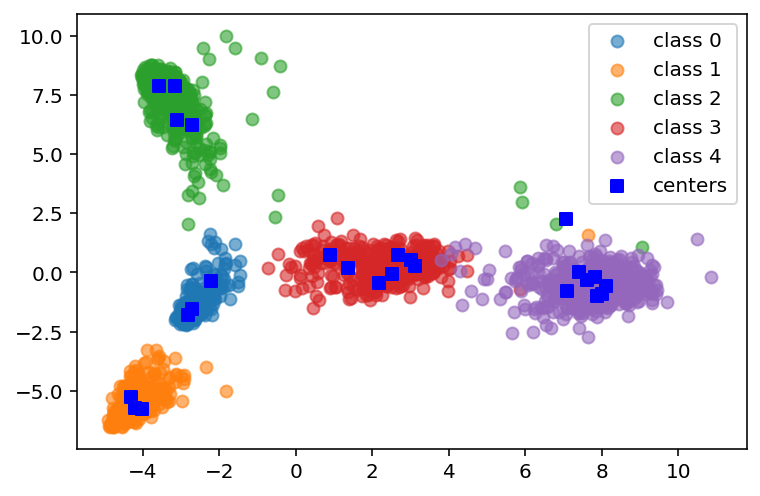

In [9]:
%config InlineBackend.figure_format = 'retina'
for label in classes:
    mask = (labels == label)
    plt.scatter(data_pca[mask, 0], data_pca[mask, 1], alpha=0.4, label="class " + str(int(label)))
plt.scatter(centers[:, 0], centers[:, 1], marker='s', label='centers', c='b')
plt.legend()

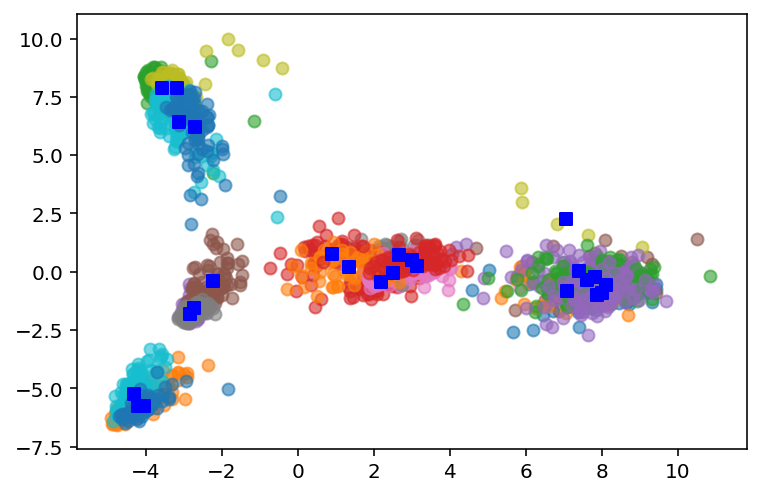

In [12]:
%config InlineBackend.figure_format = 'retina'
for label in np.unique(kmeans.labels_):
    mask = (kmeans.labels_ == label)
    plt.scatter(data_pca[mask, 0], data_pca[mask, 1], alpha=0.4, label="cluster " + str(int(label)))
plt.scatter(centers[:, 0], centers[:, 1], marker='s', label='centers', c='b')
# plt.legend()

ValueError: operands could not be broadcast together with shapes (25,4224) (12416,) 

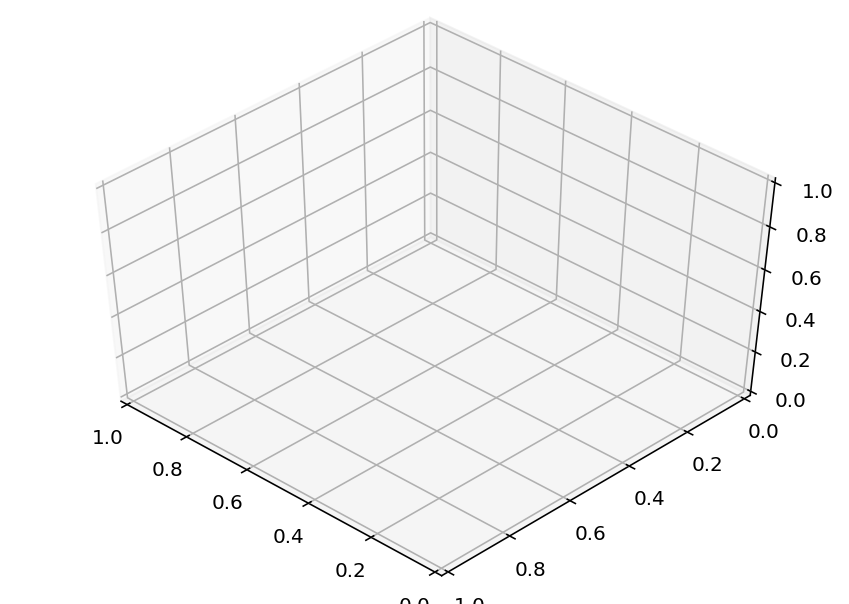

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)
centers = pca.transform(kmeans.cluster_centers_)
for label in np.unique(kmeans.labels_):
    mask = (kmeans.labels_ == label)
    plt.scatter(data_pca[mask, 0], data_pca[mask, 1], data_pca[mask, 2], alpha=0.4, label="cluster " + str(int(label)))
plt.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='s', label='centers', c='b')

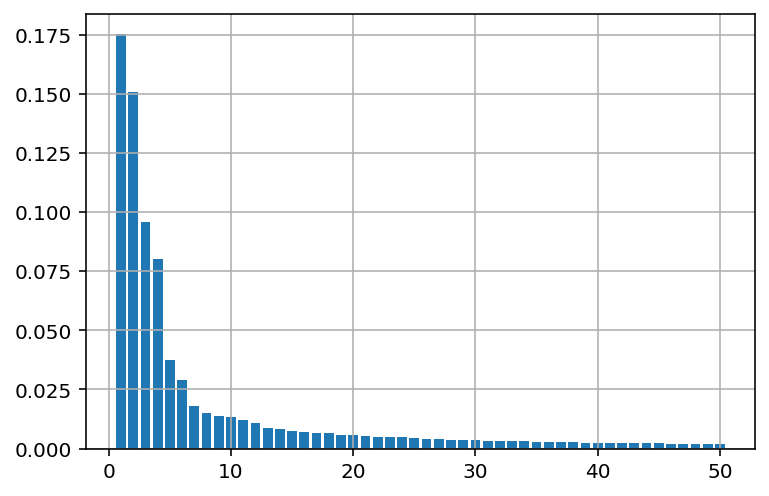

In [11]:
%config InlineBackend.figure_format = 'retina'
pca = PCA(n_components=50)
pca.fit(data)
plt.bar(range(1, 51), pca.explained_variance_ratio_)
plt.grid()

## KMeans for Different Layers

In [40]:
layer2idx = {
    'Conv1': (0, 64),
    'Conv10': (64, 576),
    'Conv11': (576, 1088),
    'Conv12': (1088, 1600),
    'Conv13': (1600, 2112),
    'Conv2': (2112, 2176),
    'Conv3': (2176, 2304),
    'Conv4': (2304, 2432),
    'Conv5': (2432, 2688),
    'Conv6': (2688, 2944),
    'Conv7': (2944, 3200),
    'Conv8': (3200, 3712),
    'Conv9': (3712, 4224),
    'FC14': (4224, 8320),
    'FC15': (8320, 12416)
}
layer2idx

{'Conv1': (0, 64),
 'Conv10': (64, 576),
 'Conv11': (576, 1088),
 'Conv12': (1088, 1600),
 'Conv13': (1600, 2112),
 'Conv2': (2112, 2176),
 'Conv3': (2176, 2304),
 'Conv4': (2304, 2432),
 'Conv5': (2432, 2688),
 'Conv6': (2688, 2944),
 'Conv7': (2944, 3200),
 'Conv8': (3200, 3712),
 'Conv9': (3712, 4224),
 'FC14': (4224, 8320),
 'FC15': (8320, 12416)}

Current plot: 1
Current plot: 2
Current plot: 3
Current plot: 4
Current plot: 5
Current plot: 6
Current plot: 7
Current plot: 8
Current plot: 9
Current plot: 10
Current plot: 11
Current plot: 12
Current plot: 13


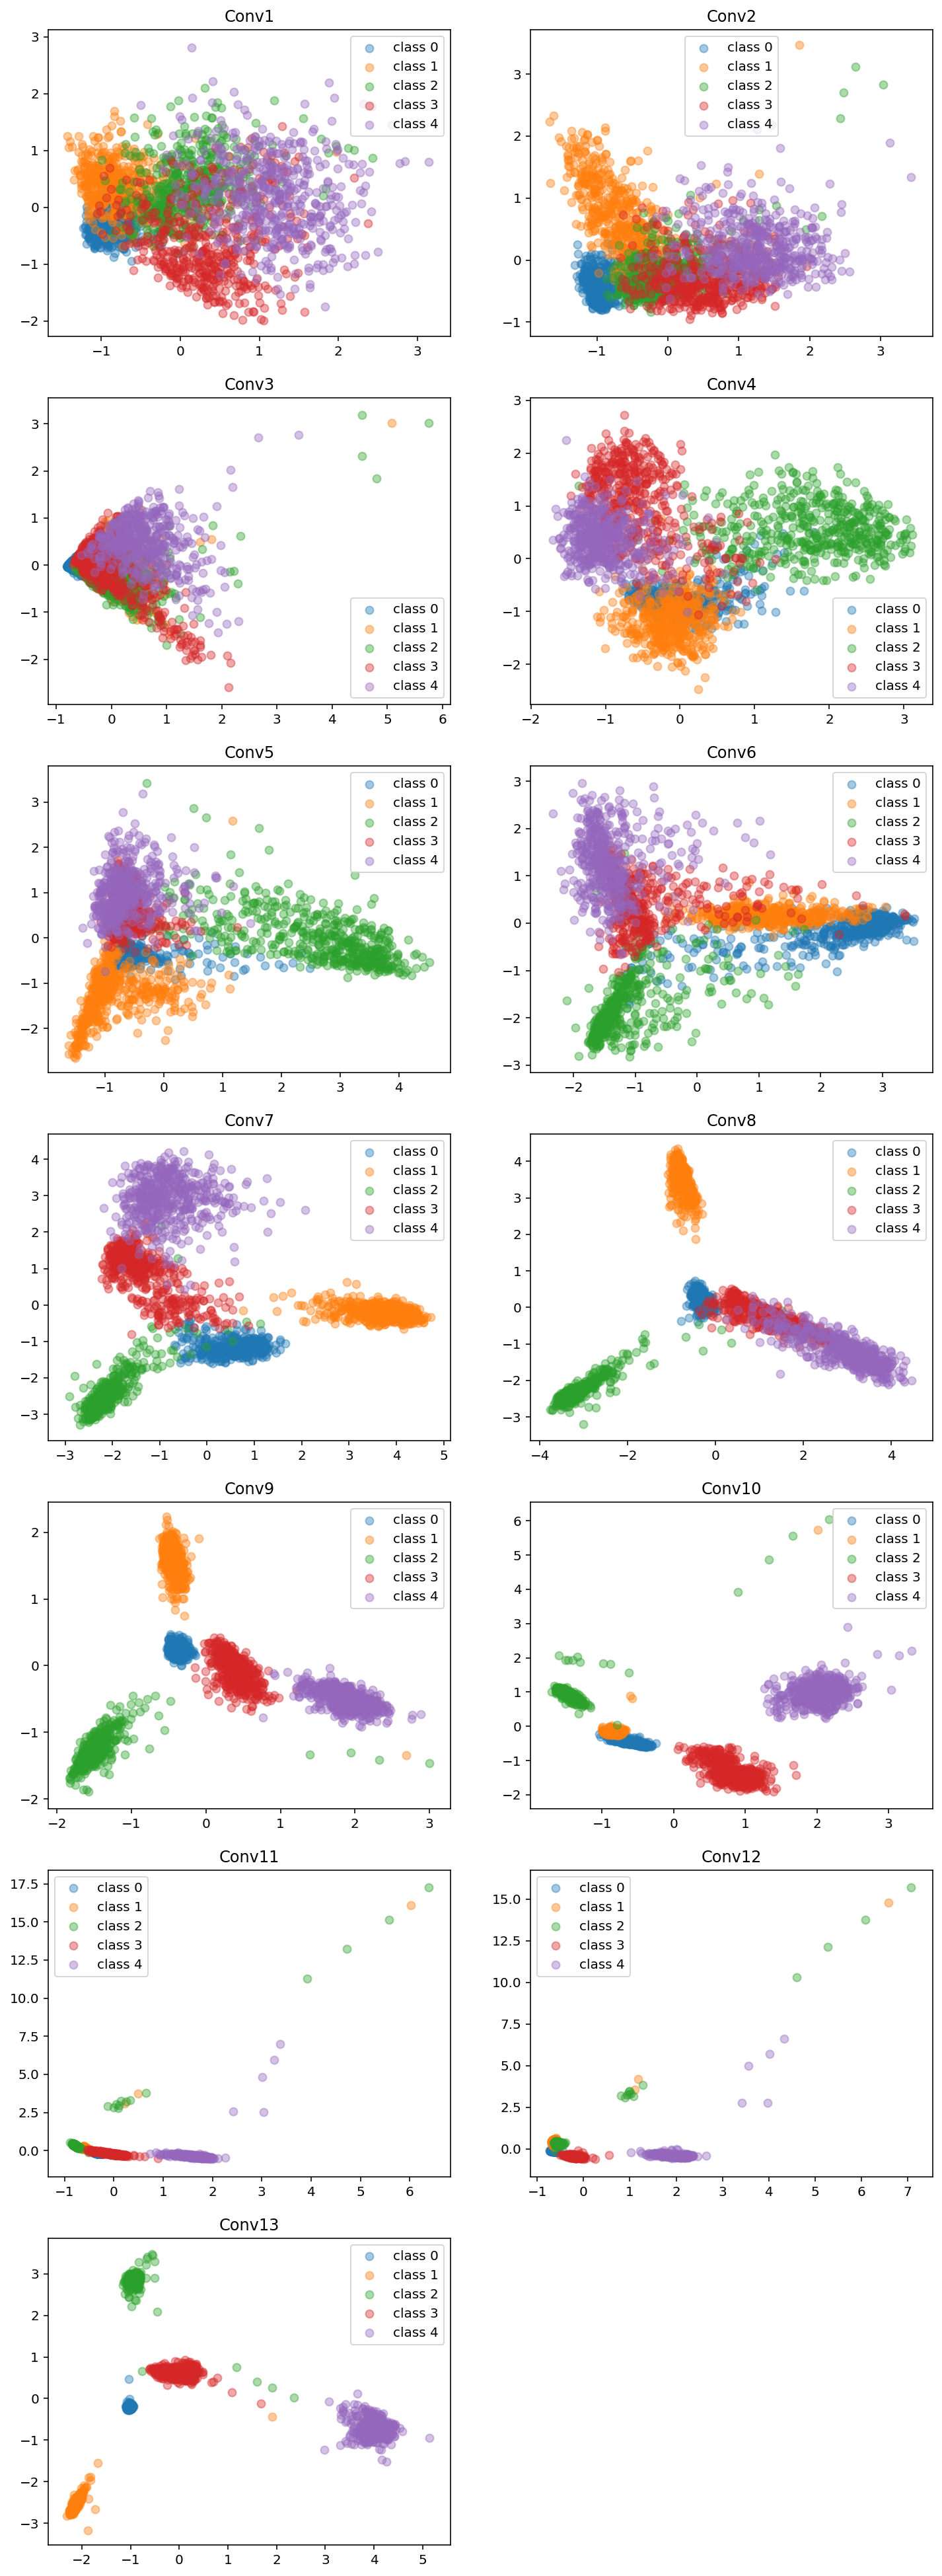

In [41]:
plt.figure(figsize=(12, 5*7))
for i in range(1, 14):
    print("Current plot: {}".format(i))
    plt.subplot(7, 2, i)
    layer = "Conv{}".format(i)
    idx = layer2idx[layer]
    X = data[:, idx[0]:idx[1]]
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    for label in classes:
        mask = (labels == label)
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                alpha=0.4, label="class " + str(int(label)))
    plt.title(layer)
    plt.legend()

Current plot: 0
Current plot: 1


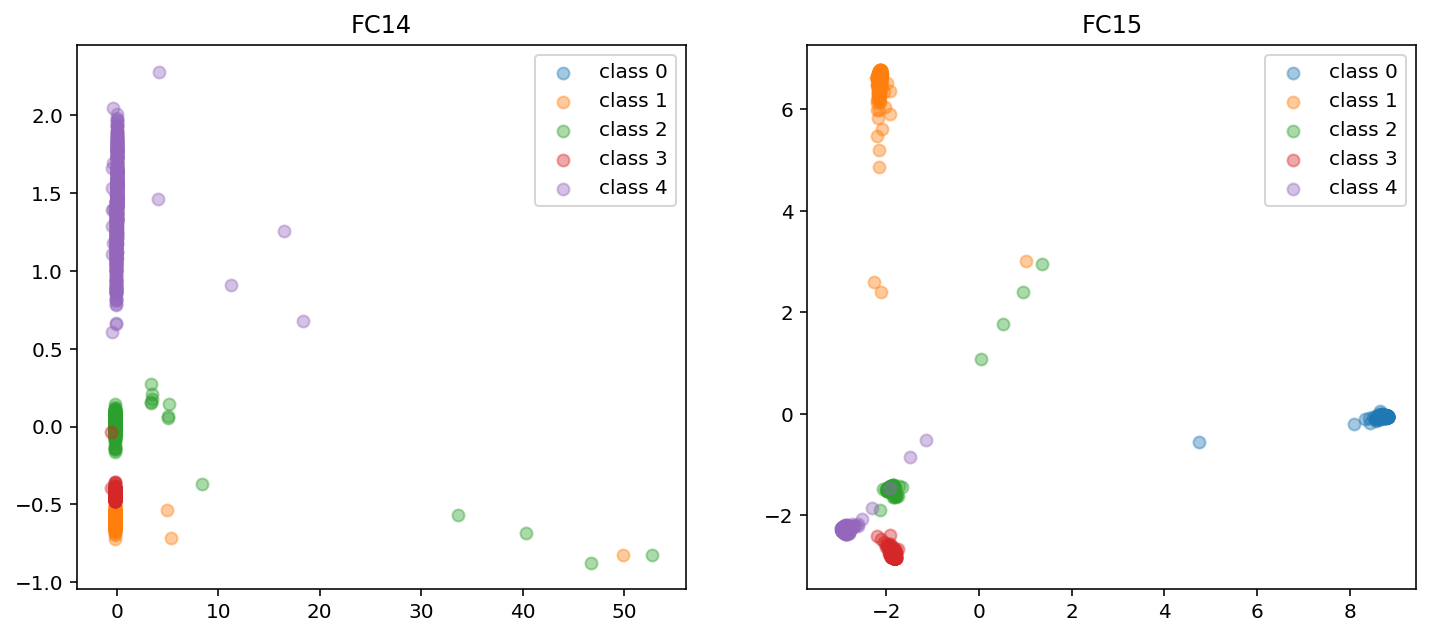

In [42]:
plt.figure(figsize=(12, 5))
for i, layer in enumerate(["FC14", "FC15"]):
    print("Current plot: {}".format(i))
    plt.subplot(1, 2, i+1)
    idx = layer2idx[layer]
    X = data[:, idx[0]:idx[1]]
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    for label in classes:
        mask = (labels == label)
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                alpha=0.4, label="class " + str(int(label)))
    plt.title(layer)
    plt.legend()

- ~~Is it necessary to prune fully connected layers?~~
- ~~Is such pruning well-defined?~~
- Is it necessary to consider FCs in clustering?
- ~~What about prediction FC layer?~~
- Layer-wise or all-in-one clustering?
    - All-in-one more safe. This first.
    - Maybe try layer-wise.

Current plot: 1
Current plot: 2
Current plot: 3
Current plot: 4
Current plot: 5
Current plot: 6
Current plot: 7
Current plot: 8
Current plot: 9
Current plot: 10
Current plot: 11
Current plot: 12
Current plot: 13


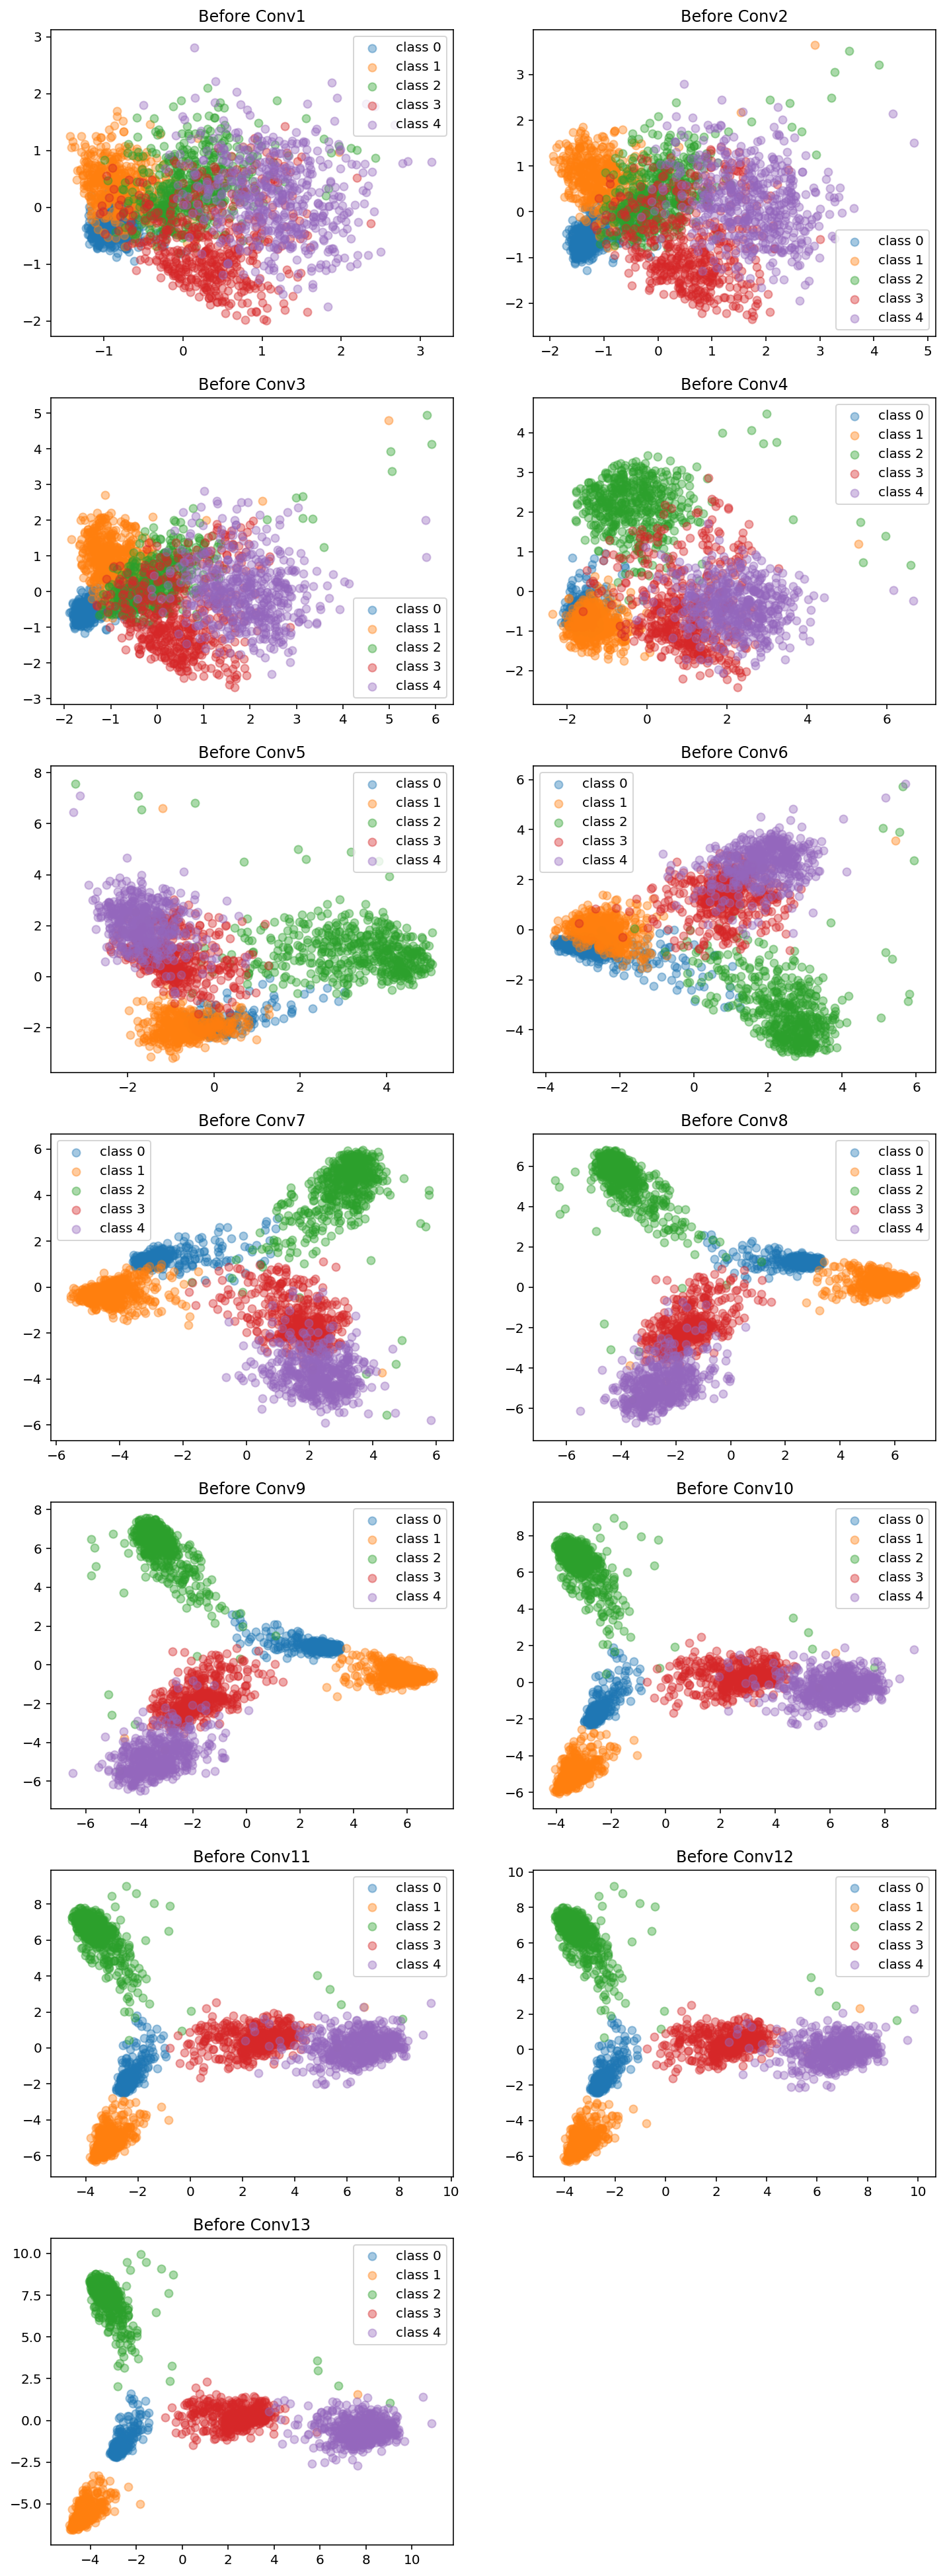

In [44]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(12, 5*7))
X = None
for i in range(1, 14):
    print("Current plot: {}".format(i))
    plt.subplot(7, 2, i)
    layer = 'Conv{}'.format(i)
    idx = layer2idx[layer]
    if X is None:
        X = data[:, :idx[1]]
    else:
        X = np.concatenate([X, data[:, idx[0]:idx[1]]], axis=1)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    for label in classes:
        mask = (labels == label)
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                alpha=0.4, label="class " + str(int(label)))
    plt.title("Before {}".format(layer))
    plt.legend()

In [39]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(12, 5*7))
for i in range(13, 0, -1):
    print("Current plot: {}".format(i))
    plt.subplot(7, 2, i)
    idx = layer2idx['Conv{}'.format(i)]
    X = data[:, :idx[1]]
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    for label in classes:
        mask = (labels == label)
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                alpha=0.4, label="class " + str(int(label)))
    plt.legend()

Current plot: 13
Current plot: 12
Current plot: 11
Current plot: 10
Current plot: 9
Current plot: 8
Current plot: 7
Current plot: 6
Current plot: 5
Current plot: 4
Current plot: 3
Current plot: 2
Current plot: 1
Error in callback <function flush_figures at 0x000001BCE2754A60> (for post_execute):


KeyboardInterrupt: 